# Lecture 13


## This Lecture
Solving Initial Value Problems (IVP) using Forward Euler Method
\begin{align*}
\begin{cases}
\mathbf{y}'=\mathbf{f}(\mathbf{y}(t),t),& \text{for}~~ t>0\\
\mathbf{y}(0)=\mathbf{y}_0
\end{cases}
\end{align*}
Here $\mathbf{y}(t)$ and  $\mathbf{f}$ are vector-valued functions; namely,
$$
\mathbf{y}(t)=(y_1(t),y_2(t),\dots,y_n(t)),~~\text{and}~~\mathbf{f}=(f_1,f_2,\dots,f_n)
$$


Forward Euler Method is derived by replacing the time derivative with forward finite-difference formula: 
$$
\mathbf{y}'(t_n)\approx \frac{\mathbf{y}(t_{n+1})- \mathbf{y}(t_{n})}{\Delta t}
$$

Where fixed time step is assumed, and $t_{n}=n\Delta t$. Denote $\mathbf{y}^n=\mathbf{y}(t_n)$, then we have
$$
 \frac{\mathbf{y}^{n+1}- \mathbf{y}^{n}}{\Delta t} = \mathbf{f}(\mathbf{y}^{n},t_n),
$$
which implies
$$
\mathbf{y}^{n+1} =  \mathbf{y}^{n}+\Delta t\mathbf{f}(\mathbf{y}^{n},t_n).
$$
So given $\mathbf{y}^{0}$, we will be able compute $\mathbf{y}^{1}$, and then  $\mathbf{y}^{2}$, and so forth 



**Example**: Consider the following IVP
\begin{align*}
\begin{cases}
{y}'=t-y^2,& \text{for}~~ t>0\\
{y}(0)=0
\end{cases}
\end{align*}
Note here $y$ is a scalar function.  Solve this IVP using forward Euler Mehtod with $\Delta t=0.1$ to a final time $T=10$.


**plot direction field**:

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def plotDirField(ax,f,tmin,tmax,nt,ymin,ymax,ny):
    # Input:
    #    ax: axis of the plot
    #     f: given by the ODE
    #   tmin: min value of t in the considered region
    #   tmax: max value of t in the considered region
    #     nt: number of grids in t axis
    #   ymin: min value of y in the considered region
    #   ymax: max value of y in the considered region
    #     ny: number of grids in y axis
    tplot=np.linspace(tmin,tmax,nt)
    yplot=np.linspace(ymin,ymax,ny)
    tt,yy=np.meshgrid(tplot,yplot)
    dirX=1./np.sqrt(1+f(tt,yy)**2)
    dirY=f(tt,yy)/np.sqrt(1+f(tt,yy)**2)
    
    ax.quiver(tt,yy,dirX,dirY)




In [3]:
def forwardEulerSolve(f,y0,T,dt):
    numberOfTimeSteps=int(T/dt)
    y=np.zeros(numberOfTimeSteps+1) # container for solutions
    t=np.zeros(numberOfTimeSteps+1) # container for times

    y[0]=y0 # initial condition
    t[0]=0.

    for i in range(numberOfTimeSteps):
        t[i+1]=t[i]+dt
        y[i+1]=y[i]+dt*f(t[i],y[i])
        
    return t,y

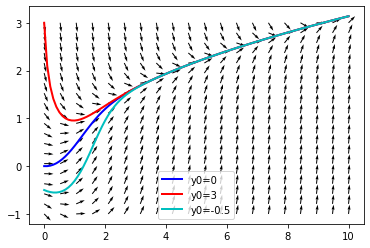

In [4]:

T=10. # final time
dt=0.1
f=lambda t,y: t-y**2

y0a=0.
ta,ya=forwardEulerSolve(f,y0a,T,dt)


y0b=3.
tb,yb=forwardEulerSolve(f,y0b,T,dt)


y0c=-.5
tc,yc=forwardEulerSolve(f,y0c,T,dt)
    
fig,ax=plt.subplots()
plotDirField(ax,f,0,10,20,-1,3,20)

ax.plot(ta,ya,'b',lw=2)
ax.plot(tb,yb,'r',lw=2)
ax.plot(tc,yc,'c',lw=2)
ax.legend(['y0=0','y0=3','y0=-0.5'])




plt.show()


Solve system of ODEs

**Example**: prey and predator model

Let $x(t)$ be the number of prey, and $y(t)$ be the number of preditor, then we have the folowing governing equation
$$
\begin{cases}
x'(t)=ax-bxy\\
y'(t)=cxy-dy\\
x(0)=x_0\\
y(0)=y_0
\end{cases}
$$
Consider the example with $a=0.4, b=0.002,c=0.001,d=0.7$, and the initiali population of prey and predator are $x_0=600$ and $y_0=400$. And we can play around the model by changing the initial conditions

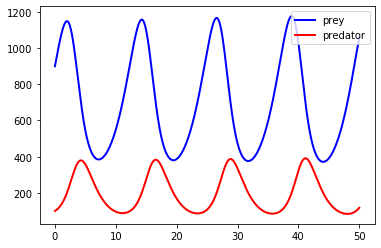

In [5]:
a=0.4
b=0.002
c=0.001
d=0.7

def f(x,y,t):
    f1=a*x-b*x*y
    f2=c*x*y-d*y
    return [f1,f2]

x0=900 
y0=100


T=50. # final time of the simulation
dt=0.01 # time step of this simulation
numberOfTimeSteps=int(T/dt)
x=np.zeros(numberOfTimeSteps+1) # container for solutions
y=np.zeros(numberOfTimeSteps+1) # container for solutions
t=np.zeros(numberOfTimeSteps+1) # container for times

x[0]=x0
y[0]=y0
t[0]=0.

for i in range(numberOfTimeSteps):
    t[i+1]=t[i]+dt
    fi=f(x[i],y[i],t[i])
    x[i+1]=x[i]+dt*fi[0]
    y[i+1]=y[i]+dt*fi[1]

    

fig,ax=plt.subplots()
ax.plot(t,x,'b',lw=2)
ax.plot(t,y,'r',lw=2)
ax.legend(['prey','predator'])

plt.show()


    



